In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
names=['Wife age','Wife education','Husband education','children','Wife religion','Wife working',' Husband occupation','Standard of living index','Media exposure','Contraceptive method used']

In [3]:
df=pd.read_csv('cmc.data.csv',header=None,names=names)

In [4]:
df.head()

,Wife age,Wife education,Husband education,children,Wife religion,Wife working,Husband occupation,Standard of living index,Media exposure,Contraceptive method used
0,24,2,3,3,1,1,2,3,0,1
1,45,1,3,10,1,1,3,4,0,1
2,43,2,3,7,1,1,3,4,0,1
3,42,3,2,9,1,1,3,3,0,1
4,36,3,3,8,1,1,3,2,0,1


In [5]:
df.isnull().sum()

Wife age                     0
Wife education               0
Husband education            0
children                     0
Wife religion                0
Wife working                 0
 Husband occupation          0
Standard of living index     0
Media exposure               0
Contraceptive method used    0
dtype: int64

In [6]:
df.dtypes

Wife age                     int64
Wife education               int64
Husband education            int64
children                     int64
Wife religion                int64
Wife working                 int64
 Husband occupation          int64
Standard of living index     int64
Media exposure               int64
Contraceptive method used    int64
dtype: object

In [7]:
df['Contraceptive method used'].value_counts()

1    629
3    511
2    333
Name: Contraceptive method used, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018C8496E948>,
      dtype=object)

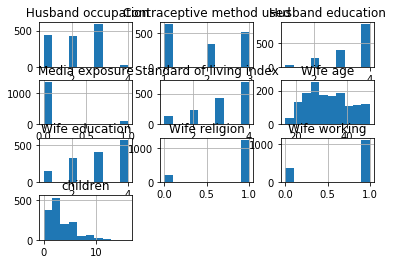

In [8]:
df.hist()

In [9]:
df.corr()

,Wife age,Wife education,Husband education,children,Wife religion,Wife working,Husband occupation,Standard of living index,Media exposure,Contraceptive method used
Wife age,1.000000,-0.048011,-0.052879,0.540126,-0.139543,-0.039880,-0.202532,0.184485,0.113306,-0.162953
Wife education,-0.048011,1.000000,0.618369,-0.193839,-0.232973,-0.062200,-0.395921,0.361450,-0.336080,0.149777
Husband education,-0.052879,0.618369,1.000000,-0.187513,-0.178447,0.001099,-0.337003,0.357490,-0.288691,0.103226
children,0.540126,-0.193839,-0.187513,1.000000,0.073917,0.097316,-0.023000,-0.006046,0.133658,0.082772
Wife religion,-0.139543,-0.232973,-0.178447,0.073917,1.000000,0.069837,0.084417,-0.196308,0.060243,-0.025271
Wife working,-0.039880,-0.062200,0.001099,0.097316,0.069837,1.000000,0.014232,-0.076505,0.001828,0.054438
Husband occupation,-0.202532,-0.395921,-0.337003,-0.023000,0.084417,0.014232,1.000000,-0.293831,0.113925,0.018161
Standard of living index,0.184485,0.361450,0.357490,-0.006046,-0.196308,-0.076505,-0.293831,1.000000,-0.251359,0.091149
Media exposure,0.113306,-0.336080,-0.288691,0.133658,0.060243,0.001828,0.113925,-0.251359,1.000000,-0.119206
Contraceptive method used,-0.162953,0.149777,0.103226,0.082772,-0.025271,0.054438,0.018161,0.091149,-0.119206,1.000000


In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.combine import SMOTETomek

Using TensorFlow backend.


In [11]:
lr,rfr,dtc=LogisticRegression(),RandomForestClassifier(),DecisionTreeClassifier()

In [12]:
cols=['Wife education', 'Husband education', 'children',
       'Wife religion', 'Wife working', ' Husband occupation',
       'Standard of living index', 'Media exposure',
       'Contraceptive method used']

In [13]:
df.head()

,Wife age,Wife education,Husband education,children,Wife religion,Wife working,Husband occupation,Standard of living index,Media exposure,Contraceptive method used
0,24,2,3,3,1,1,2,3,0,1
1,45,1,3,10,1,1,3,4,0,1
2,43,2,3,7,1,1,3,4,0,1
3,42,3,2,9,1,1,3,3,0,1
4,36,3,3,8,1,1,3,2,0,1


In [14]:
x=df.drop('Contraceptive method used',axis=1)

In [15]:
y=df.iloc[:,-1].values.reshape(-1,1)

In [16]:
from keras.utils import np_utils

In [17]:
y=np_utils.to_categorical(y)

In [18]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,stratify=y)

In [19]:
smk=SMOTETomek()

In [20]:
xtrain,ytrain=smk.fit_sample(xtrain,ytrain)

In [21]:
model=[lr,rfr,dtc]

In [22]:
#for m in model:
 #   m.fit(xtrain,ytrain)
 #   print(accuracy_score(m.predict(xtest),ytest))
 #   print(classification_report(m.predict(xtest),ytest))
 #   print(confusion_matrix(m.predict(xtest),ytest))
 #   cv=cross_val_score(m,x,y,cv=10)
 #   print('cv score is',cv.mean())
 #   print('cv score std is', cv.std())

In [23]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [24]:
classifier=Sequential()

In [25]:
classifier.add(Dense(output_dim=30,init='uniform',input_dim=9,activation='relu'))

In [26]:
classifier.add(Dense(output_dim=20,init='uniform',activation='relu'))

In [27]:
#classifier.add(Dense(output_dim=15,init='uniform',activation='relu'))

In [28]:
#classifier.add(Dense(output_dim=15,init='uniform',activation='relu'))

In [29]:
#classifier.add(Dense(output_dim=15,init='uniform',activation='relu'))

In [30]:
#classifier.add(Dense(output_dim=5,init='uniform',activation='relu'))

In [31]:
classifier.add(Dense(output_dim=3,init='uniform',activation='softmax'))

In [32]:
classifier.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [33]:
classifier.fit(xtrain,ytrain,nb_epoch=600,batch_size=10)

Epoch 1/600
1267/1267 [==============================] - 1s 417us/step - loss: 1.0978 - accuracy: 0.3362
Epoch 2/600
1267/1267 [==============================] - 0s 313us/step - loss: 1.0931 - accuracy: 0.3512
Epoch 3/600
1267/1267 [==============================] - 0s 319us/step - loss: 1.0681 - accuracy: 0.4586
Epoch 4/600
1267/1267 [==============================] - 0s 309us/step - loss: 1.0150 - accuracy: 0.5051
Epoch 5/600
1267/1267 [==============================] - 0s 320us/step - loss: 0.9767 - accuracy: 0.5335
Epoch 6/600
1267/1267 [==============================] - 0s 310us/step - loss: 0.9577 - accuracy: 0.5509
Epoch 7/600
1267/1267 [==============================] - 0s 313us/step - loss: 0.9472 - accuracy: 0.5470
Epoch 8/600
1267/1267 [==============================] - 0s 306us/step - loss: 0.9421 - accuracy: 0.5509
Epoch 9/600
1267/1267 [==============================] - 0s 316us/step - loss: 0.9320 - accuracy: 0.5722
Epoch 10/600
1267/1267 [==============================]

1267/1267 [==============================] - 0s 321us/step - loss: 0.8291 - accuracy: 0.6180
Epoch 79/600
1267/1267 [==============================] - 0s 316us/step - loss: 0.8312 - accuracy: 0.6219
Epoch 80/600
1267/1267 [==============================] - 0s 297us/step - loss: 0.8260 - accuracy: 0.6259
Epoch 81/600
1267/1267 [==============================] - 0s 297us/step - loss: 0.8321 - accuracy: 0.6204
Epoch 82/600
1267/1267 [==============================] - 0s 328us/step - loss: 0.8319 - accuracy: 0.6180
Epoch 83/600
1267/1267 [==============================] - 0s 284us/step - loss: 0.8281 - accuracy: 0.6172
Epoch 84/600
1267/1267 [==============================] - 0s 259us/step - loss: 0.8338 - accuracy: 0.6156
Epoch 85/600
1267/1267 [==============================] - 0s 240us/step - loss: 0.8289 - accuracy: 0.6275
Epoch 86/600
1267/1267 [==============================] - 1s 457us/step - loss: 0.8321 - accuracy: 0.6275
Epoch 87/600
1267/1267 [==============================] - 1

1267/1267 [==============================] - 1s 467us/step - loss: 0.8047 - accuracy: 0.6298
Epoch 155/600
1267/1267 [==============================] - 0s 272us/step - loss: 0.7985 - accuracy: 0.6338
Epoch 156/600
1267/1267 [==============================] - 0s 258us/step - loss: 0.8019 - accuracy: 0.6361
Epoch 157/600
1267/1267 [==============================] - 0s 245us/step - loss: 0.7991 - accuracy: 0.6417
Epoch 158/600
1267/1267 [==============================] - 0s 244us/step - loss: 0.7978 - accuracy: 0.6409
Epoch 159/600
1267/1267 [==============================] - 0s 237us/step - loss: 0.7951 - accuracy: 0.6243
Epoch 160/600
1267/1267 [==============================] - 1s 543us/step - loss: 0.7926 - accuracy: 0.6409
Epoch 161/600
1267/1267 [==============================] - 1s 549us/step - loss: 0.7920 - accuracy: 0.6433
Epoch 162/600
1267/1267 [==============================] - 1s 542us/step - loss: 0.7900 - accuracy: 0.6440
Epoch 163/600
1267/1267 [==========================

1267/1267 [==============================] - 1s 553us/step - loss: 0.7710 - accuracy: 0.6480
Epoch 231/600
1267/1267 [==============================] - 1s 574us/step - loss: 0.7737 - accuracy: 0.6567
Epoch 232/600
1267/1267 [==============================] - 1s 761us/step - loss: 0.7721 - accuracy: 0.6504
Epoch 233/600
1267/1267 [==============================] - 1s 799us/step - loss: 0.7711 - accuracy: 0.6456
Epoch 234/600
1267/1267 [==============================] - 1s 612us/step - loss: 0.7712 - accuracy: 0.6480
Epoch 235/600
1267/1267 [==============================] - 1s 578us/step - loss: 0.7731 - accuracy: 0.6464
Epoch 236/600
1267/1267 [==============================] - 1s 584us/step - loss: 0.7679 - accuracy: 0.6527
Epoch 237/600
1267/1267 [==============================] - 1s 559us/step - loss: 0.7744 - accuracy: 0.6456
Epoch 238/600
1267/1267 [==============================] - 1s 578us/step - loss: 0.7694 - accuracy: 0.6559
Epoch 239/600
1267/1267 [==========================

1267/1267 [==============================] - 1s 594us/step - loss: 0.7487 - accuracy: 0.6559
Epoch 307/600
1267/1267 [==============================] - 1s 591us/step - loss: 0.7389 - accuracy: 0.6598
Epoch 308/600
1267/1267 [==============================] - 1s 572us/step - loss: 0.7516 - accuracy: 0.6519
Epoch 309/600
1267/1267 [==============================] - 1s 568us/step - loss: 0.7437 - accuracy: 0.6630
Epoch 310/600
1267/1267 [==============================] - 1s 581us/step - loss: 0.7396 - accuracy: 0.6669
Epoch 311/600
1267/1267 [==============================] - 1s 557us/step - loss: 0.7409 - accuracy: 0.6582
Epoch 312/600
1267/1267 [==============================] - 1s 527us/step - loss: 0.7413 - accuracy: 0.6622
Epoch 313/600
1267/1267 [==============================] - 1s 508us/step - loss: 0.7423 - accuracy: 0.6606
Epoch 314/600
1267/1267 [==============================] - 1s 499us/step - loss: 0.7435 - accuracy: 0.6543
Epoch 315/600
1267/1267 [==========================

1267/1267 [==============================] - 0s 309us/step - loss: 0.7107 - accuracy: 0.6740
Epoch 383/600
1267/1267 [==============================] - 0s 340us/step - loss: 0.7222 - accuracy: 0.6772
Epoch 384/600
1267/1267 [==============================] - 0s 356us/step - loss: 0.7142 - accuracy: 0.6756
Epoch 385/600
1267/1267 [==============================] - 0s 378us/step - loss: 0.7141 - accuracy: 0.6740
Epoch 386/600
1267/1267 [==============================] - 0s 366us/step - loss: 0.7182 - accuracy: 0.6748
Epoch 387/600
1267/1267 [==============================] - 0s 373us/step - loss: 0.7124 - accuracy: 0.6654
Epoch 388/600
1267/1267 [==============================] - 0s 249us/step - loss: 0.7132 - accuracy: 0.6772
Epoch 389/600
1267/1267 [==============================] - 0s 287us/step - loss: 0.7077 - accuracy: 0.6756
Epoch 390/600
1267/1267 [==============================] - 0s 294us/step - loss: 0.7105 - accuracy: 0.6827
Epoch 391/600
1267/1267 [==========================

1267/1267 [==============================] - 0s 310us/step - loss: 0.6878 - accuracy: 0.6922
Epoch 459/600
1267/1267 [==============================] - 0s 348us/step - loss: 0.6945 - accuracy: 0.6811
Epoch 460/600
1267/1267 [==============================] - 0s 322us/step - loss: 0.6891 - accuracy: 0.6985
Epoch 461/600
1267/1267 [==============================] - 0s 321us/step - loss: 0.6879 - accuracy: 0.6906
Epoch 462/600
1267/1267 [==============================] - 0s 354us/step - loss: 0.6911 - accuracy: 0.6780
Epoch 463/600
1267/1267 [==============================] - 0s 272us/step - loss: 0.6880 - accuracy: 0.6898
Epoch 464/600
1267/1267 [==============================] - 0s 266us/step - loss: 0.6864 - accuracy: 0.6890
Epoch 465/600
1267/1267 [==============================] - 0s 242us/step - loss: 0.6900 - accuracy: 0.6914
Epoch 466/600
1267/1267 [==============================] - 0s 294us/step - loss: 0.6856 - accuracy: 0.6890
Epoch 467/600
1267/1267 [==========================

1267/1267 [==============================] - 0s 323us/step - loss: 0.6723 - accuracy: 0.6938
Epoch 535/600
1267/1267 [==============================] - 0s 313us/step - loss: 0.6770 - accuracy: 0.6914
Epoch 536/600
1267/1267 [==============================] - 0s 366us/step - loss: 0.6696 - accuracy: 0.7024
Epoch 537/600
1267/1267 [==============================] - 1s 543us/step - loss: 0.6695 - accuracy: 0.6938
Epoch 538/600
1267/1267 [==============================] - 0s 372us/step - loss: 0.6708 - accuracy: 0.7009
Epoch 539/600
1267/1267 [==============================] - 0s 332us/step - loss: 0.6724 - accuracy: 0.6969
Epoch 540/600
1267/1267 [==============================] - 0s 257us/step - loss: 0.6706 - accuracy: 0.6969
Epoch 541/600
1267/1267 [==============================] - 0s 307us/step - loss: 0.6676 - accuracy: 0.6938
Epoch 542/600
1267/1267 [==============================] - 0s 309us/step - loss: 0.6669 - accuracy: 0.7032
Epoch 543/600
1267/1267 [==========================

In [36]:
classifier.predict(xtest)

array([[1.9166076e-01, 7.5724863e-02, 7.3261434e-01],
       [1.1666227e-01, 6.5186596e-01, 2.3147182e-01],
       [5.1454777e-01, 4.8531085e-01, 1.4136055e-04],
       ...,
       [9.9122131e-01, 3.1205316e-06, 8.7755509e-03],
       [1.8796641e-01, 5.3784835e-01, 2.7418527e-01],
       [2.6869705e-01, 1.1669979e-01, 6.1460310e-01]], dtype=float32)